In [1]:
#importing libraries
import time
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#pd.set_option('display.max_colwidth', None)

## Load dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [6]:
#deleting customerID column
df.drop("customerID",axis=1,inplace=True)

In [7]:
df.duplicated().sum()

22

In [8]:
#deleting duplicates
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.duplicated().sum()

0

In [9]:
df['TotalCharges'].value_counts()

          11
19.75      9
20.2       8
19.9       7
19.65      7
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
df['TotalCharges'].replace(' ', np.nan, inplace=True)
df['TotalCharges'].value_counts()

19.75     9
20.2      8
19.9      7
19.65     7
20.05     6
         ..
6849.4    1
692.35    1
130.15    1
3211.9    1
6844.5    1
Name: TotalCharges, Length: 6530, dtype: int64

## Checking unique values in every column

In [11]:
pd.Series({c: df[c].unique() for c in df})

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies                        [No, Yes, No internet service]
Contract            

In [12]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [14]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


### Feature engineering : converting categorical variable values into numerical

In [16]:
col=['Partner', 'Dependents','PhoneService', 'PaperlessBilling','Churn','MultipleLines', 'OnlineSecurity', 
     'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
for i in col:
    df[i] = df[i].apply(lambda x: 2 if x=='Yes' else 1 if x=='No' else 0)

In [17]:
df['gender'] = df['gender'].apply(lambda x: 1 if x=='Male' else 0)
df['InternetService'] = df['InternetService'].apply(lambda x: 2 if x=='DSL' else 1 if x=='Fiber optic' else 0)
df['Contract'] = df['Contract'].apply(lambda x: 1 if x=='Month-to-month' else 0) 
df['PaymentMethod'] = df['PaymentMethod'].apply(lambda x: 1 if x=='Electronic check' else 1 if x=='Mailed check' else 0)

In [18]:
pd.Series({c: df[c].unique() for c in df})

gender                                                         [0, 1]
SeniorCitizen                                                  [0, 1]
Partner                                                        [2, 1]
Dependents                                                     [1, 2]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                   [1, 2]
MultipleLines                                               [0, 1, 2]
InternetService                                             [2, 1, 0]
OnlineSecurity                                              [1, 2, 0]
OnlineBackup                                                [2, 1, 0]
DeviceProtection                                            [1, 2, 0]
TechSupport                                                 [1, 2, 0]
StreamingTV                                                 [1, 2, 0]
StreamingMovies                                             [1, 2, 0]
Contract            

In [19]:
abs(df.corr()['Churn']).sort_values(ascending= False)
#abs(train.corr()['Item_Outlet_Sales']).sort_values(ascending= True)

Churn               1.000000
Contract            0.404884
tenure              0.351508
PaymentMethod       0.208956
MonthlyCharges      0.194508
PaperlessBilling    0.190891
StreamingTV         0.166073
StreamingMovies     0.164621
Dependents          0.163459
SeniorCitizen       0.151619
Partner             0.149135
DeviceProtection    0.085550
OnlineBackup        0.075052
InternetService     0.047366
MultipleLines       0.037429
TechSupport         0.027513
OnlineSecurity      0.023758
PhoneService        0.011323
gender              0.008763
Name: Churn, dtype: float64

<AxesSubplot:>

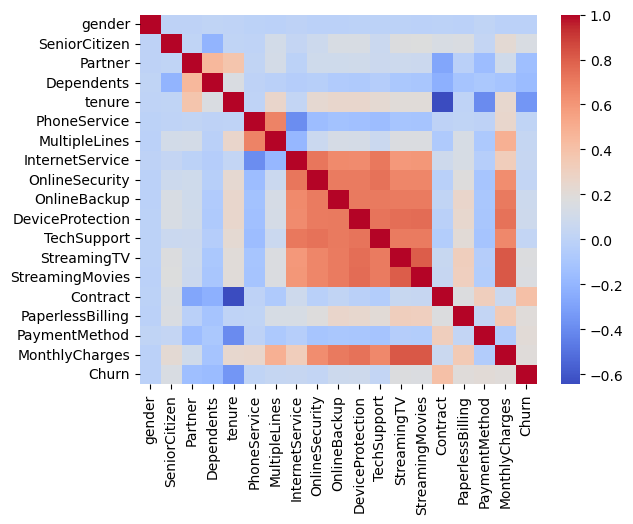

In [20]:
sns.heatmap(df.corr(), cmap="coolwarm")

In [21]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [22]:
variables = ['tenure', 'MonthlyCharges', 'MultipleLines', 'InternetService', 'Partner', 
             'PaperlessBilling', 'OnlineSecurity', 'DeviceProtection', 'Contract', 'PaymentMethod']

target = ['Churn']

X = df[variables]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

multiple_models = LazyClassifier(verbose=0, ignore_warnings=True, predictions=True)
models, predictions = multiple_models.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:12<00:00,  2.41it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.76,0.76,0.76,0.77,0.04
NearestCentroid,0.71,0.75,0.75,0.73,0.06
QuadraticDiscriminantAnalysis,0.76,0.74,0.74,0.77,0.03
SGDClassifier,0.78,0.72,0.72,0.79,0.05
AdaBoostClassifier,0.80,0.72,0.72,0.80,0.28
SVC,0.80,0.71,0.71,0.80,1.60
BernoulliNB,0.75,0.71,0.71,0.76,0.05
LogisticRegression,0.80,0.71,0.71,0.79,0.07
CalibratedClassifierCV,0.80,0.71,0.71,0.79,0.44
